In [1]:
import os
import sys
os.environ["OMP_NUM_THREADS"] = "11"
os.environ["OPENBLAS_NUM_THREADS"] = "8" # export OPENBLAS_NUM_THREADS=4 
os.environ["MKL_NUM_THREADS"] = "11" # export MKL_NUM_THREADS=6
os.environ["VECLIB_MAXIMUM_THREADS"] = "8" # export VECLIB_MAXIMUM_THREADS=4
os.environ["NUMEXPR_NUM_THREADS"] = "11" # export NUMEXPR_NUM_THREADS=6
os.environ["NUMBA_CACHE_DIR"]='/tmp/numba_cache'


import importlib
import gcate #import the module here, so that it can be reloaded.

importlib.reload(gcate)

from gcate import *
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats
from tqdm import tqdm
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)

def legend_title_left(leg):
    c = leg.get_children()[0]
    title = c.get_children()[0]
    hpack = c.get_children()[1]
    c._children = [hpack]
    hpack._children = [title] + hpack.get_children()

# Simulated data

## Example

In [2]:
family = 'poisson'
kwargs_glm = {'family':family}
path_data = 'data/ex2/{}/'.format(family)



d = 3
n = 100
r = 2
seed = 1
print(n,r,seed)
offset = 0

intercept = 1
file_name = path_data + 'n_{}_r_{}_seed_{}.npz'.format(n,r,seed)
with open(file_name, 'rb') as f:
    tmp = np.load(f)
    X = tmp['X']
    B_true = tmp['B']
    Gamma = tmp['Gamma']
    Z = tmp['Z']
    D = tmp['D']
    W = tmp['W']
    Y = tmp['Y'].astype(float)
    id_genes = np.any(Y, axis=0)
    Y = Y[:,id_genes]
    Theta = X @ B_true.T + Z @ Gamma.T
    scale_factor = np.ones([1,X.shape[1]])
    
print(X.shape, Y.shape)

print(np.mean(Y!=0))

X = X[:,1:]

n_infer = int(n)
X_test = X.copy()
Y_test = Y.copy()

n, d = X.shape
_, p = Y.shape

100 2 1
(100, 3) (100, 3000)
0.7944433333333333


### Select number of factors

In [3]:
r_max = 5
df_r = estimate_r(Y, X, r_max, 
    kwargs_glm=kwargs_glm, 
    kwargs_es_1={'max_iters': 600},
    kwargs_es_2={'max_iters': 600},
    kwargs_ls_2={'alpha':0.01},
    c1=0.02,
    intercept=intercept, offset=offset, C=1e5
)

{'kwargs_es': {'max_iters': 600,
               'patience': 20,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'poisson',
                'nuisance': array([[1., 1., 1., ..., 1., 1., 1.]])},
 'kwargs_ls': {'alpha': 0.1, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 2, 'n': 100, 'p': 3000, 'r': 1}


  8%|▊         | 46/600 [00:32<06:27,  1.43it/s, nll=0.62] 


Best Epoch: 25. Best Metric: 0.619364.
Early stopped.
{'kwargs_es': {'max_iters': 600,
               'patience': 20,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'poisson',
                'nuisance': array([[1., 1., 1., ..., 1., 1., 1.]])},
 'kwargs_ls': {'alpha': 0.01, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 2, 'n': 100, 'p': 3000, 'r': 1}


  4%|▍         | 26/600 [00:20<07:30,  1.27it/s, nll=0.62] 


Best Epoch: 5. Best Metric: 0.618602.
Early stopped.
{'kwargs_es': {'max_iters': 600,
               'patience': 20,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'poisson',
                'nuisance': array([[1., 1., 1., ..., 1., 1., 1.]])},
 'kwargs_ls': {'alpha': 0.1, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 2, 'n': 100, 'p': 3000, 'r': 2}


  7%|▋         | 44/600 [00:00<00:12, 44.15it/s, nll=0.59]


Best Epoch: 23. Best Metric: 0.585474.
Early stopped.
{'kwargs_es': {'max_iters': 600,
               'patience': 20,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'poisson',
                'nuisance': array([[1., 1., 1., ..., 1., 1., 1.]])},
 'kwargs_ls': {'alpha': 0.01, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 2, 'n': 100, 'p': 3000, 'r': 2}


  5%|▍         | 28/600 [00:00<00:15, 37.13it/s, nll=0.58]


Best Epoch: 7. Best Metric: 0.584080.
Early stopped.
{'kwargs_es': {'max_iters': 600,
               'patience': 20,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'poisson',
                'nuisance': array([[1., 1., 1., ..., 1., 1., 1.]])},
 'kwargs_ls': {'alpha': 0.1, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 2, 'n': 100, 'p': 3000, 'r': 3}


  9%|▉         | 55/600 [00:01<00:12, 44.94it/s, nll=0.58]


Best Epoch: 34. Best Metric: 0.579798.
Early stopped.
{'kwargs_es': {'max_iters': 600,
               'patience': 20,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'poisson',
                'nuisance': array([[1., 1., 1., ..., 1., 1., 1.]])},
 'kwargs_ls': {'alpha': 0.01, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 2, 'n': 100, 'p': 3000, 'r': 3}


  5%|▍         | 28/600 [00:00<00:14, 38.33it/s, nll=0.58]


Best Epoch: 7. Best Metric: 0.578464.
Early stopped.
{'kwargs_es': {'max_iters': 600,
               'patience': 20,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'poisson',
                'nuisance': array([[1., 1., 1., ..., 1., 1., 1.]])},
 'kwargs_ls': {'alpha': 0.1, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 2, 'n': 100, 'p': 3000, 'r': 4}


  8%|▊         | 50/600 [00:01<00:11, 49.83it/s, nll=0.57]


Best Epoch: 29. Best Metric: 0.573680.
Early stopped.
{'kwargs_es': {'max_iters': 600,
               'patience': 20,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'poisson',
                'nuisance': array([[1., 1., 1., ..., 1., 1., 1.]])},
 'kwargs_ls': {'alpha': 0.01, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 2, 'n': 100, 'p': 3000, 'r': 4}


  5%|▍         | 28/600 [00:00<00:13, 41.80it/s, nll=0.57]


Best Epoch: 7. Best Metric: 0.572214.
Early stopped.
{'kwargs_es': {'max_iters': 600,
               'patience': 20,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'poisson',
                'nuisance': array([[1., 1., 1., ..., 1., 1., 1.]])},
 'kwargs_ls': {'alpha': 0.1, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 2, 'n': 100, 'p': 3000, 'r': 5}


 11%|█         | 67/600 [00:01<00:10, 52.05it/s, nll=0.57]


Best Epoch: 46. Best Metric: 0.567575.
Early stopped.
{'kwargs_es': {'max_iters': 600,
               'patience': 20,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'poisson',
                'nuisance': array([[1., 1., 1., ..., 1., 1., 1.]])},
 'kwargs_ls': {'alpha': 0.01, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 2, 'n': 100, 'p': 3000, 'r': 5}


  5%|▍         | 29/600 [00:00<00:13, 41.49it/s, nll=0.57]


Best Epoch: 8. Best Metric: 0.566002.
Early stopped.


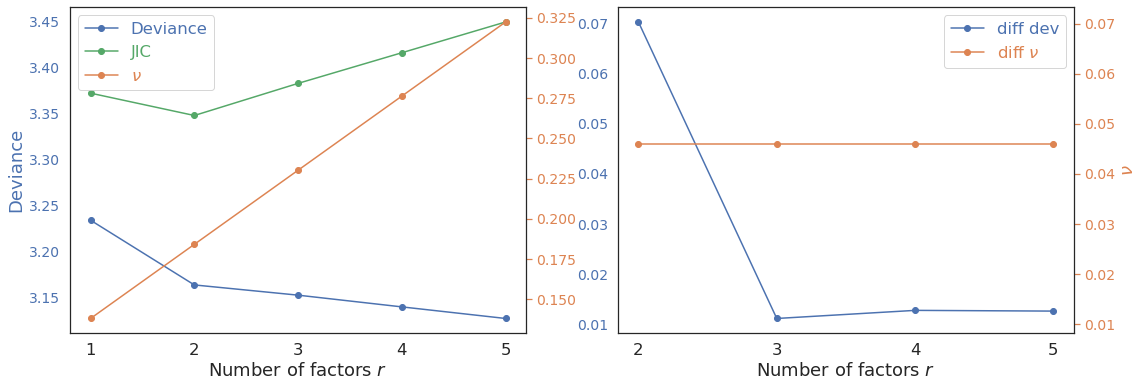

In [4]:
from gcate import plot_r
sns.set(font_scale=1.5, style='white')
fig = plot_r(df_r)
plt.savefig('result/JIC.pdf', bbox_inches='tight', dpi=300)

{'kwargs_es': {'max_iters': 600,
               'patience': 20,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'poisson',
                'nuisance': array([[1., 1., 1., ..., 1., 1., 1.]])},
 'kwargs_ls': {'alpha': 0.1, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 2, 'n': 100, 'p': 3000, 'r': 2}


  7%|▋         | 44/600 [00:20<04:20,  2.13it/s, nll=0.59] 


Best Epoch: 23. Best Metric: 0.585474.
Early stopped.


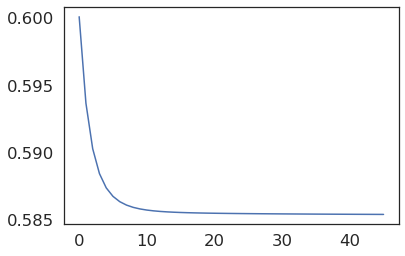

In [5]:
A01, A02, info = alter_min(Y, r, X=X, P1=True, 
    kwargs_glm=kwargs_glm, kwargs_es={'max_iters': 600}, 
    intercept=intercept, offset=offset, C=1e5)
Q, _ = sp.linalg.qr(A02[:,d:], mode='economic')
P_Gamma = np.identity(p) - Q @ Q.T
plt.plot(info['hist'])

{'kwargs_es': {'max_iters': 200,
               'patience': 20,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'poisson',
                'nuisance': array([[1., 1., 1., ..., 1., 1., 1.]])},
 'kwargs_ls': {'alpha': 0.01, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 2, 'n': 100, 'p': 3000, 'r': 2}


 14%|█▍        | 28/200 [00:20<02:03,  1.39it/s, nll=0.58] 


Best Epoch: 7. Best Metric: 0.584080.
Early stopped.
0.884


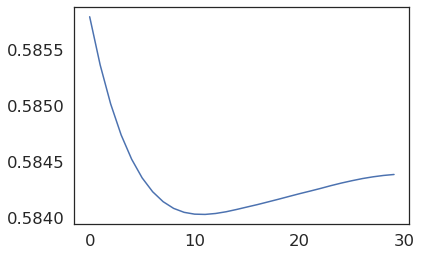

In [6]:
A1, A2, info = alter_min(Y, r, X=X, P2=P_Gamma, A=A01.copy(), B=A02.copy(), 
                         lam=0.02*np.sqrt(np.log(p)/n),
                         kwargs_glm=kwargs_glm, kwargs_ls={'alpha':0.01},
                         intercept=intercept, offset=offset, C=1e5
                        )
B = A2[:, :d]
print(np.mean(np.abs(B[:,-1])<1e-3))
plt.plot(info['hist'])

### Select $\lambda_n$

In [7]:
lams = np.r_[
            np.linspace(0,0.01,11)[1:],
            np.linspace(0,0.1,11)[2:],
            np.linspace(0,1,11)[2:]
            ] *  np.sqrt(np.log(n)/n)
            
B_de, se = debias(
    Y, A1, A2,
    P_Gamma, d, i=d-1, intercept=intercept, offset=offset,
    lam=lams, kwargs_glm=kwargs_glm)

100%|██████████| 3000/3000 [03:25<00:00, 14.60it/s]


In [8]:
df_res = pd.DataFrame()
for i_lam,lam in enumerate(lams):
    z_scores = (B_de[:,i_lam] / se[:,i_lam])
    pvals = sp.stats.norm.sf(np.abs(z_scores))*2
    _df = pd.DataFrame({
        'z_scores':z_scores, 
        'p_values':pvals,
        'q_values':multipletests(pvals, alpha=0.05, method='fdr_bh')[1]
    })
    _df['lam'] = lam
    df_res = pd.concat([df_res, _df])

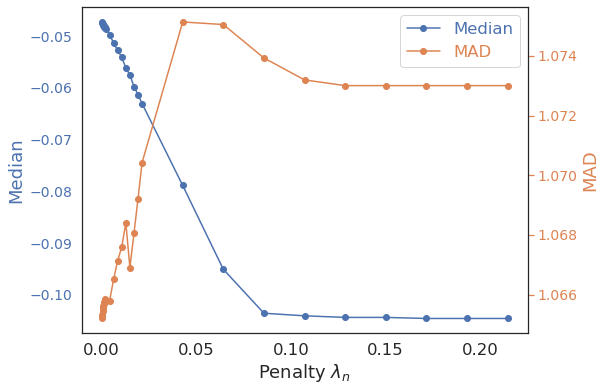

In [9]:
from gcate import plot_lam
fig = plot_lam(df_res)
plt.savefig('result/c2.pdf', bbox_inches='tight', dpi=300)

## Figure 2 Data

In [10]:
family = 'negative_binomial'
kwargs_glm = {'family':family}
path_data = 'data/ex2/{}/'.format(family)

d = 3
n = 250
r = 2
seed = 0
print(n,r,seed)
offset = 0

intercept = 1
file_name = path_data + 'n_{}_r_{}_seed_{}.npz'.format(n,r,seed)
with open(file_name, 'rb') as f:
    tmp = np.load(f)
    X = tmp['X']
    B_true = tmp['B']
    Gamma = tmp['Gamma']
    Z = tmp['Z']
    D = tmp['D']
    W = tmp['W']
    Y = tmp['Y'].astype(float)
    id_genes = np.any(Y, axis=0)
    Y = Y[:,id_genes]
    Theta = X @ B_true.T + Z @ Gamma.T

    scale_factor = np.ones([1,X.shape[1]])
    Y1 = Y.copy()
    
    
tvals = []
pvals = []
B = []
for j in range(Y.shape[1]):
    mod = sm.GLM(Y[:,j], X[:,1:], offset=X[:,0], family=sm.families.Poisson()).fit()
    B.append(mod.params)
    tvals.append(mod.tvalues[-1])
    pvals.append(mod.pvalues[-1])
B_glm = np.array(B)
tvals = np.array(tvals)
pvals = np.array(pvals)

mu_glm = np.mean(np.exp(X[:,1:] @ B_glm.T), axis=0)
disp_glm_1 = (np.mean((Y - mu_glm[None,:])**2, axis=0) - mu_glm) / mu_glm**2


n = 200
seed = 0
path_data = 'data/ex3/'
Y = pd.read_csv(path_data+'{}_{}_Y.csv'.format(n,seed)).values.astype(np.float32)
B_true = pd.read_csv(path_data+'{}_{}_B.csv'.format(n,seed)).values[:,0]
X = pd.read_csv(path_data+'{}_{}_X.csv'.format(n,seed)).values

id_genes = np.any(Y, axis=0) & (np.sum(Y>0, axis=0)>=10)
p_all = Y.shape[1]
Y = Y[:,id_genes]
X = X / np.sqrt(np.sum(X**2, 0, keepdims=True)) * np.sqrt(n)

print(X.shape, Y.shape)

tvals = []
pvals = []
B = []
# d = 1
for j in range(Y.shape[1]):
    mod = sm.GLM(Y[:,j], X[:,:], family=sm.families.Poisson()).fit()
    B.append(mod.params)
    tvals.append(mod.tvalues[-1])
    pvals.append(mod.pvalues[-1])
B_glm = np.array(B)
tvals = np.array(tvals)
pvals = np.array(pvals)

mu_glm = np.mean(np.exp(X @ B_glm.T), axis=0)
disp_glm_2 = (np.mean((Y - mu_glm[None,:])**2, axis=0) - mu_glm) / mu_glm**2

250 2 0


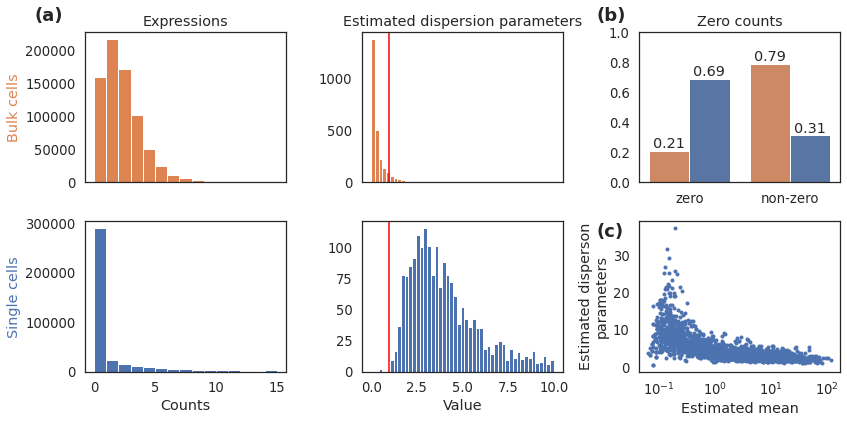

In [11]:
import seaborn as sns
sns.set_theme(style="white", font_scale=1.2)
fig, axes = plt.subplots(2,3, figsize=(12,6))
bins = np.arange(0,16,1)
axes[0,0].hist(Y1.flatten(), bins, color=sns.color_palette()[1])
axes[0,1].hist(disp_glm_1, np.linspace(0,10,50), color=sns.color_palette()[1])
axes[0,1].axvline(1, color='red')

sns.barplot(data=
            pd.DataFrame({'Count':['zero','non-zero','zero','non-zero'], 
                          'Value':[np.mean(Y1==0),np.mean(Y1!=0), np.mean(Y2==0),np.mean(Y2!=0)],
                          'Dataset':['Bulk cell', 'Bulk cell', 'Single cell', 'Single cell']
                         })
            , x="Count", y="Value", hue='Dataset', 
            palette=sns.color_palette()[1::-1], 
            ax=axes[0,2])
axes[0,2].bar_label(axes[0,2].containers[0], fmt='%.02f')
axes[0,2].bar_label(axes[0,2].containers[1], fmt='%.02f')
axes[0,2].set_ylim([0,1.])
axes[0,2].get_legend().remove()

bins = np.arange(0,16,1)
axes[1,0].hist(Y2.flatten(), bins)
axes[1,1].hist(disp_glm_2, np.linspace(0,10,50))
axes[1,1].axvline(1, color='red')

axes[1,2].plot(mu_glm, disp_glm_2,'.')
axes[1,2].set_xscale('log')


axes[1,0].set_xlabel('Counts')
axes[1,1].set_xlabel('Value')
axes[1,2].set_xlabel('Estimated mean')

axes[0,2].set_xlabel('')
for i in range(2):
    axes[i,2].set_ylabel('')
for j in range(2):
    axes[0,j].set_xticks([])    
axes[1,2].set_ylabel('Estimated disperson\nparameters')

axes[0,0].set_ylabel('Bulk cells', color=sns.color_palette()[1])
axes[1,0].set_ylabel('Single cells', color=sns.color_palette()[0])


axes[0,0].set_title('Expressions')
axes[0,1].set_title('Estimated dispersion parameters')
axes[0,2].set_title('Zero counts')

fig.tight_layout()
plt.figtext(0.05, 0.95, '(a)', weight='bold', fontsize=18)
plt.figtext(0.7, 0.95, '(b)', weight='bold', fontsize=18)
plt.figtext(0.7, 0.45, '(c)', weight='bold', fontsize=18)
plt.savefig('result/data_dist.pdf', bbox_inches='tight', pad_inches=0, dpi=300)

## Figure G3

In [12]:
family = 'poisson'
path_data = 'data/ex5/'
path_result = 'result/ex5/'
def load_res(path_result, method, p, n, r, seed):
    _df = pd.read_csv(
        path_result+'{}_{}_{}_{}_{}.csv'.format(method, p,n,r,seed),
    )
    _df['seed'] = seed
    _df['p'] = p
    _df['n'] = n
    _df['r'] = r
    return _df

df_res = pd.DataFrame()

method = 'gcate_raw_poisson'
r = 2
for p in [1500,3000]:
    for n in [100,250,500,750]:
        for seed in range(100):
            print(p,n,seed)
            _df = load_res(path_result, method, p, n, r, seed)
            if np.any(np.isnan(_df['B_hat'])):
                continue
            df_res = pd.concat([df_res, _df])
df_res = df_res.reset_index(drop=True)
df_res['diff'] = df_res['B_hat']  - df_res['B_true']
df = df_res.groupby(['p','n','r','seed'])['diff'].apply(lambda x: (x ** 2).mean())
df = df.reset_index()
df.to_csv('res.csv')

In [13]:
# df.to_csv('res.csv')
df = pd.read_csv('res.csv', index_col=0)

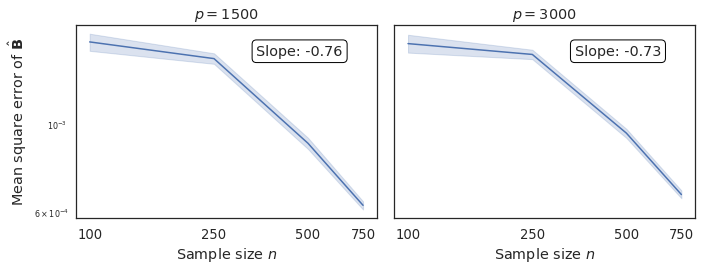

In [14]:
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import ScalarFormatter

sns.set(style="white", font_scale=1.2)
fig, axes = plt.subplots(1,2, figsize=(10,4), sharey=True)
for j,p in enumerate([1500,3000]):
    df_tmp = df[(df['n']>0)&(df['p']==p)]
    sns.lineplot(data=df_tmp, x='n', y='diff', ax=axes[j])

    # Compute the slope using linear regression
    X = np.log10(df_tmp[df_tmp['n']>100][['n']].values)
    y = np.log10(df_tmp[df_tmp['n']>100]['diff'].values)
    reg = LinearRegression().fit(X, y)
    slope = reg.coef_[0]

    # Display the slope on the plot
    axes[j].text(0.6, 0.9, f'Slope: {slope:.2f}', transform=axes[j].transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

    axes[j].set_title('$p={}$'.format(p))
    axes[j].set_xscale('log')
    axes[j].set_yscale('log')
    
    
    axes[j].set_xticks([100,250,500,750])
    axes[j].set_xticklabels([100,250,500,750])
    axes[j].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

    axes[j].tick_params(axis = 'y', which = 'both', labelsize = 8)

    # axes[j].set_xticks([100,250,500,750])
    # axes[j].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

    # axes[j].xaxis.set_major_formatter(ScalarFormatter())
    # axes[j].xaxis.set_minor_formatter(ScalarFormatter())

    # axes[j].yaxis.set_major_formatter(ScalarFormatter())
    # axes[j].yaxis.set_minor_formatter(ScalarFormatter())
    
    axes[j].set_xlabel('Sample size $n$')
axes[0].set_ylabel(r'Mean square error of $\hat{\mathbf{B}}$')
axes[1].set_ylabel('')
fig.tight_layout()
plt.savefig('result/est_err.pdf', bbox_inches='tight', dpi=300)

## Figure 3 Type-I errors

In [15]:
family = 'poisson'
path_result = 'result/ex2/{}/'.format(family)

p = 3000

def load_res(path_result, method, n, r, seed):
    if not method.startswith('cate'):
        _method = '{}_{}'.format(method, family)
    else:
        _method = method

    _df = pd.read_csv(
        path_result+'{}_{}_{}_{}.csv'.format(_method, n,r,seed),
    )
    
    if method.startswith('gcate'):
        _df_tmp = pd.DataFrame()
        for i, lam in enumerate(np.unique(_df['c2'])):
            _df_3 = _df[_df['c2']==lam].reset_index(drop=True)
            if np.any(np.isnan(_df_3[['p_values','q_values']])):
                print(method,n,r,seed,  lam, 'Nan')
                continue
            _df_2 = comp_stat(_df_3, alpha=0.05, q_alpha=0.2, n_top=50)
            _df_2['c2'] = lam
            _df_2['median'] =np.nanmedian(_df_3['z_scores'])
            _df_tmp = pd.concat([
                _df_tmp,
                _df_2
            ])
        _df_tmp = _df_tmp.sort_values('c2').reset_index(drop=True)
        idc = np.where(_df_tmp['median'].abs()>0.1)[0]
        idc = 1 if len(idc)==0 else idc[0]        
        _df_tmp = _df_tmp.iloc[idc - 1:idc,:]
        _df = _df_tmp
    else:
        if np.any(np.isnan(_df[['p_values','q_values']])):
            print(method,n,r,seed, 'Nan')
            return None
        _df = comp_stat(_df, alpha=0.05, q_alpha=0.2, n_top=50)
        _df['c2'] = np.nan
    _df['Method'] = method_name[method]
    _df['seed'] = seed
    _df['n'] = n
    _df['r'] = r
    return _df

method_list = ['cate_raw','gcate_raw', 
               'glm', 'glm_oracle'
              ]
method_name_list = ['CATE', 'GCATE', 
                    'GLM', 'GLM-Oracle'
                   ]
method_name = {i:j for i,j in zip(method_list,method_name_list)}
df_res = pd.DataFrame()

# for method in ['cate_raw','gcate_raw',
#                'glm', 'glm_oracle']:
#     df = pd.read_csv(path_result+'result_summary_{}.csv'.format(method))
#     df_res = pd.concat([df_res, df], axis=0)
    
method_list = ['cate_raw','glm', 'glm_oracle', 'gcate_raw']
for n in [100,250]:
    for r in [2,10]:
        for seed in range(100):
            for method in method_list:
                try:
                    _df = load_res(path_result, method, n, r, seed)            
                    df_res = pd.concat([df_res, _df])
                except:
                    print(method, n, r, seed)
                    continue
    
df_res = df_res.reset_index(drop=True)
df_res['Method'].unique()

metric = ['type1_err','fdp','power','precision']
df_res = pd.melt(df_res, id_vars=['Method','seed','n','r','c2'], value_vars=metric)
metric_name = ['Type-I error','FDP','Power','Precision']
df_res['variable'] = df_res['variable'].map({i:j for i,j in zip(metric,metric_name)})
df_res['c2'] = np.nan
    
# for method in method_list:
#     df_res[df_res['Method'] == method_name[method]].reset_index().to_csv(
#         path_result+'result_summary_{}.csv'.format(method), index=False)

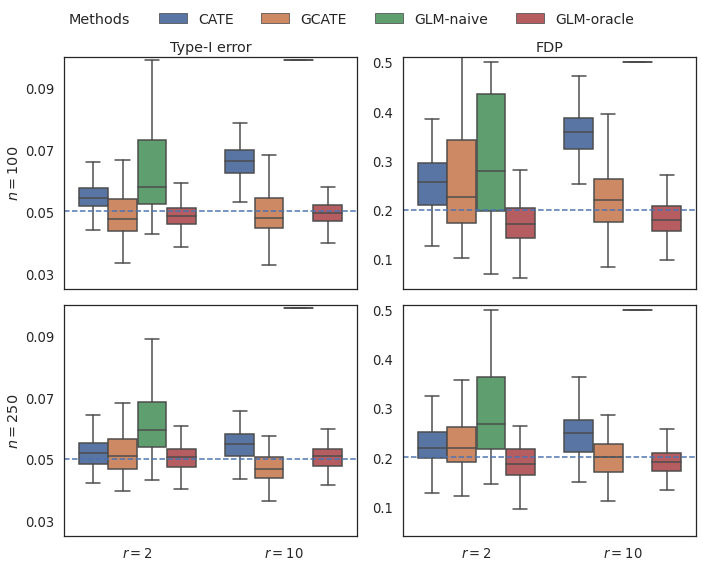

In [16]:
sns.set_theme(style="white", font_scale=1.2)
fig, axes = plt.subplots(2,2,figsize=(10,8), sharex='col')
method_name_list = ['CATE', 'GCATE', 'GLM', 'GLM-Oracle']

for i,n in enumerate([100,250]):
    _df = pd.DataFrame()
    for r in [2,10]:
        _df = pd.concat([
            _df,
            df_res[(df_res['n']==n) & (df_res['r']==r) & df_res['variable'].isin(['Type-I error','FDP'])]
             ], axis=0).reset_index(drop=True)
        _df.loc[_df['r']==r,'r'] = '$r={}$'.format(r)

    idx = (_df['variable']=='Type-I error')&(_df['Method']=='GLM')
    _df.loc[idx, 'value'] = np.clip(_df.loc[idx, 'value'],0.,0.099)
    
    idx = (_df['variable']=='FDP')&(_df['Method']=='GLM')
    _df.loc[idx, 'value'] = np.clip(_df.loc[idx, 'value'],0.,0.499)
    
    for j,metric in enumerate(['Type-I error','FDP']):
        sns.boxplot(_df[_df['variable']==metric], x='r', y='value', hue='Method',
                    hue_order=method_name_list, showfliers=False, ax=axes[i,j])
        xlim = axes[i,j].get_xlim()
        if j==0:
            axes[i,j].hlines(0.05,-0.5,2.5, linestyle='--')
        else:
            axes[i,j].hlines(0.2,-0.5,2.5, linestyle='--')
        axes[i,j].set_xlim(xlim)
        
        if i==0:
            axes[i,j].set_title(metric)
        else:
            axes[i,j].set_title('')
            
        if j==0:
            axes[i,j].set_ylabel('$n={}$'.format(n))
        else:
            axes[i,j].set_ylabel('')            
    axes[i,0].set_ylim([0.025,.1])
    axes[i,1].set_ylim([0.04,.51])
    

for j in range(2):
    axes[0,j].set_xlabel('')
    
    axes[1,j].set_xlabel('')
for i in range(2):
    axes[i,0].set_yticks([0.03,0.05,0.07,0.09])

lines_labels = [ax.get_legend_handles_labels() for ax in [axes[0,0]]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
_, indices = np.unique(labels, return_index=True)
labels = ['CATE', 'GCATE', 'GLM-naive', 'GLM-oracle']
for i in range(2):
    for j in range(2):
        axes[i,j].get_legend().remove()
        
legend = fig.legend(handles=handles, labels=labels,
                    loc=9, ncol=10, title='Methods', frameon=False, fontsize=14)
legend_title_left(legend)

fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.savefig('result/ex2_error.pdf'.format(n), bbox_inches='tight', pad_inches=0, dpi=300)

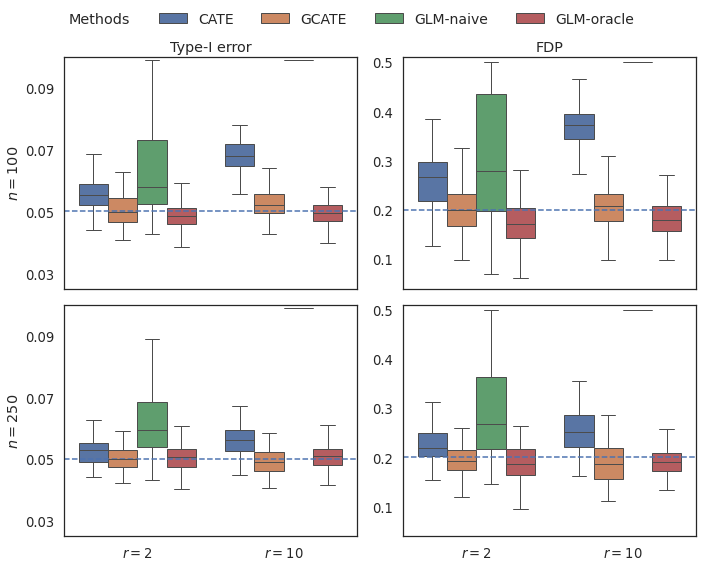

In [17]:
sns.set_theme(style="white", font_scale=1.2)
fig, axes = plt.subplots(2,2,figsize=(10,8), sharex='col')
method_name_list = ['CATE', 'GCATE', 'GLM', 'GLM-Oracle']

for i,n in enumerate([100,250]):
    _df = pd.DataFrame()
    for r in [2,10]:
        _df = pd.concat([
            _df,
            df_res[(df_res['n']==n) & (df_res['r']==r) & df_res['variable'].isin(['Type-I error','FDP'])]
             ], axis=0).reset_index(drop=True)
        _df.loc[_df['r']==r,'r'] = '$r={}$'.format(r)

    idx = (_df['variable']=='Type-I error')&(_df['Method']=='GLM')
    _df.loc[idx, 'value'] = np.clip(_df.loc[idx, 'value'],0.,0.099)
    
    idx = (_df['variable']=='FDP')&(_df['Method']=='GLM')
    _df.loc[idx, 'value'] = np.clip(_df.loc[idx, 'value'],0.,0.499)
    
    for j,metric in enumerate(['Type-I error','FDP']):
        sns.boxplot(_df[_df['variable']==metric], x='r', y='value', hue='Method',
                    hue_order=method_name_list, showfliers=False, ax=axes[i,j])
        xlim = axes[i,j].get_xlim()
        if j==0:
            axes[i,j].hlines(0.05,-0.5,2.5, linestyle='--')
        else:
            axes[i,j].hlines(0.2,-0.5,2.5, linestyle='--')
        axes[i,j].set_xlim(xlim)
        
        if i==0:
            axes[i,j].set_title(metric)
        else:
            axes[i,j].set_title('')
            
        if j==0:
            axes[i,j].set_ylabel('$n={}$'.format(n))
        else:
            axes[i,j].set_ylabel('')            
    axes[i,0].set_ylim([0.025,.1])
    axes[i,1].set_ylim([0.04,.51])
    

for j in range(2):
    axes[0,j].set_xlabel('')
    
    axes[1,j].set_xlabel('')
for i in range(2):
    axes[i,0].set_yticks([0.03,0.05,0.07,0.09])

lines_labels = [ax.get_legend_handles_labels() for ax in [axes[0,0]]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
_, indices = np.unique(labels, return_index=True)
labels = ['CATE', 'GCATE', 'GLM-naive', 'GLM-oracle']
for i in range(2):
    for j in range(2):
        axes[i,j].get_legend().remove()
        
legend = fig.legend(handles=handles, labels=labels,
                    loc=9, ncol=10, title='Methods', frameon=False, fontsize=14)
legend_title_left(legend)

fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.savefig('result/ex2_r_error.pdf'.format(n), bbox_inches='tight', pad_inches=0, dpi=300)

## Figure 3 Power

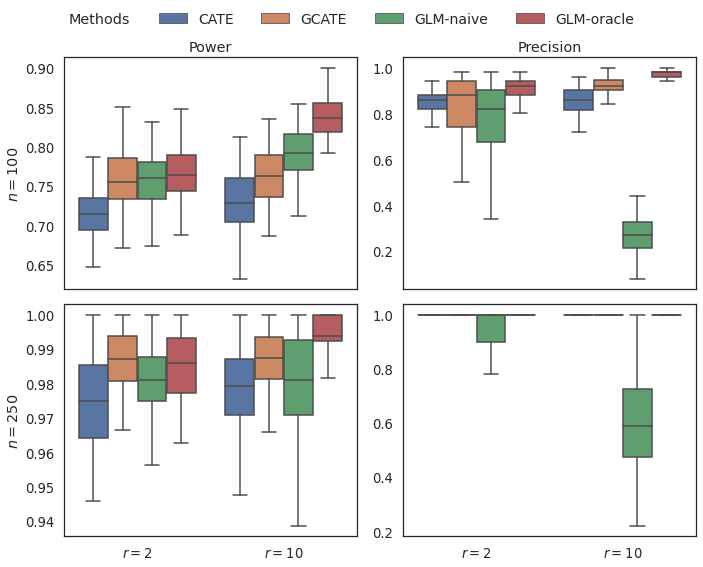

In [18]:
sns.set_theme(style="white", font_scale=1.2)
fig, axes = plt.subplots(2,2,figsize=(10,8), sharex='col')
method_name_list = ['CATE', 'GCATE', 'GLM', 'GLM-Oracle']

for i,n in enumerate([100,250]):
    _df = pd.DataFrame()
    for r in [2,10]:
        _df = pd.concat([
            _df,
            df_res[(df_res['n']==n) & (df_res['r']==r)& df_res['variable'].isin(['Power','Precision'])]
             ], axis=0).reset_index(drop=True)
        _df.loc[_df['r']==r,'r'] = '$r={}$'.format(r)
    
    for j,metric in enumerate(['Power','Precision']):
        sns.boxplot(_df[_df['variable']==metric], x='r', y='value', hue='Method',
                    hue_order=method_name_list, showfliers=False, ax=axes[i,j])
        xlim = axes[i,j].get_xlim()
        
        if i==0:
            axes[i,j].set_title(metric)
        else:
            axes[i,j].set_title('')
            
        if j==0:
            axes[i,j].set_ylabel('$n={}$'.format(n))
        else:
            axes[i,j].set_ylabel('')

for j in range(2):
    axes[0,j].set_xlabel('')
    
    axes[1,j].set_xlabel('')


lines_labels = [ax.get_legend_handles_labels() for ax in [axes[0,0]]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
_, indices = np.unique(labels, return_index=True)
labels = ['CATE', 'GCATE', 'GLM-naive', 'GLM-oracle']
for i in range(2):
    for j in range(2):
        axes[i,j].get_legend().remove()
        
legend = fig.legend(handles=handles, labels=labels,
                    loc=9, ncol=10, title='Methods', frameon=False, fontsize=14)
legend_title_left(legend)

fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.savefig('result/ex2_power.pdf'.format(n), bbox_inches='tight', pad_inches=0, dpi=300)

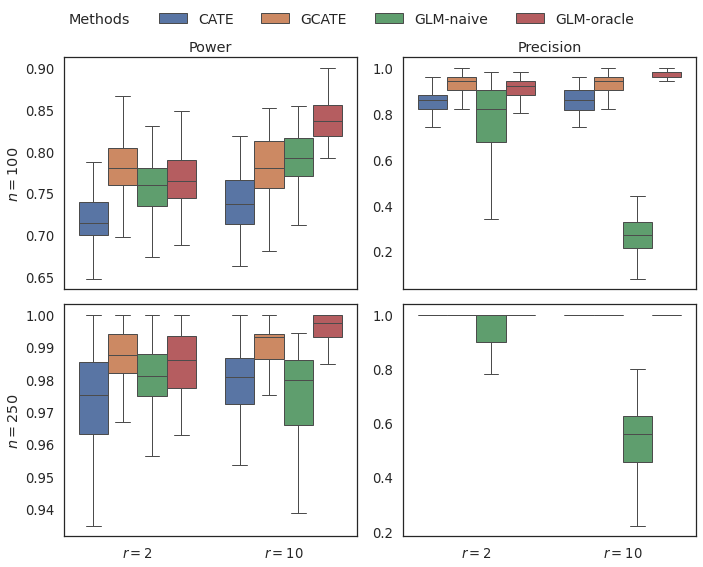

In [19]:
sns.set_theme(style="white", font_scale=1.2)
fig, axes = plt.subplots(2,2,figsize=(10,8), sharex='col')
method_name_list = ['CATE', 'GCATE', 'GLM', 'GLM-Oracle']

for i,n in enumerate([100,250]):
    _df = pd.DataFrame()
    for r in [2,10]:
        _df = pd.concat([
            _df,
            df_res[(df_res['n']==n) & (df_res['r']==r)& df_res['variable'].isin(['Power','Precision'])]
             ], axis=0).reset_index(drop=True)
        _df.loc[_df['r']==r,'r'] = '$r={}$'.format(r)
    
    for j,metric in enumerate(['Power','Precision']):
        sns.boxplot(_df[_df['variable']==metric], x='r', y='value', hue='Method',
                    hue_order=method_name_list, showfliers=False, ax=axes[i,j])
        xlim = axes[i,j].get_xlim()
        
        if i==0:
            axes[i,j].set_title(metric)
        else:
            axes[i,j].set_title('')
            
        if j==0:
            axes[i,j].set_ylabel('$n={}$'.format(n))
        else:
            axes[i,j].set_ylabel('')

for j in range(2):
    axes[0,j].set_xlabel('')
    
    axes[1,j].set_xlabel('')


lines_labels = [ax.get_legend_handles_labels() for ax in [axes[0,0]]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
_, indices = np.unique(labels, return_index=True)
labels = ['CATE', 'GCATE', 'GLM-naive', 'GLM-oracle']
for i in range(2):
    for j in range(2):
        axes[i,j].get_legend().remove()
        
legend = fig.legend(handles=handles, labels=labels,
                    loc=9, ncol=10, title='Methods', frameon=False, fontsize=14)
legend_title_left(legend)

fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.savefig('result/ex2_r_power.pdf'.format(n), bbox_inches='tight', pad_inches=0, dpi=300)

## Figure 4 FDP vs alpha

In [20]:
def comp_stat_alpha(df, alpha=0.05, q_alpha=0.2):
    return pd.DataFrame.from_dict({
        "type1_err": np.mean(df[df['signals']==0]['p_values']<alpha),
        "power": np.mean(df[df['signals']==1]['p_values']<alpha),
        "fdp": np.mean(df[df['q_values']<alpha]['signals']==0),
    }, orient='index').T

In [21]:
df_res = pd.DataFrame()
threshold = np.linspace(0,0.1,11)[1:]

path_result = 'result/ex2/{}/'.format(family)
for method in method_list:
    for i,n in enumerate([100,250]):
        for j,r in enumerate([2,10]):
            for seed in range(100):
                if not method.startswith('cate'):
                    _method = '{}_{}'.format(method, family)
                else:
                    _method = method
                df = pd.read_csv(
                        path_result+'{}_{}_{}_{}.csv'.format(_method, n,r,seed), #index_col=0
                    )
                for alpha in threshold:
                    if method.startswith('gcate'):
                        _df_tmp = pd.DataFrame()
                        for lam in np.unique(df['c2']):
                            _df_3 = df[df['c2']==lam].reset_index(drop=True)
                            if np.any(np.isnan(_df_3[['p_values','q_values']])):
                                print(method,n,r,seed,  lam, 'Nan')
                                continue
                            _df_2 = comp_stat_alpha(_df_3, alpha=alpha)
                            _df_2['c2'] = lam
                            _df_2['median'] =np.nanmedian(_df_3['z_scores'])
                            _df_tmp = pd.concat([
                                _df_tmp,
                                _df_2
                            ])
                        if _df_tmp.shape[0]>0:                            
                            _df_tmp = _df_tmp.sort_values('c2').reset_index(drop=True)
                            idc = np.where(_df_tmp['median'].abs()>0.1)[0]
                            idc = 1 if len(idc)==0 else idc[0]        
                            _df_tmp = _df_tmp.iloc[idc - 1:idc,:]
                        _df = _df_tmp
                    else:
                        if np.any(np.isnan(df[['p_values','q_values']])):
                            print(method,n,r,seed, 'Nan')

                        _df = comp_stat_alpha(df, alpha=alpha)
                        _df['c2'] = np.nan
                    _df['Method'] = method_name[method]
                    _df['seed'] = seed
                    _df['r'] = r
                    _df['n'] = n
                    _df['alpha'] = alpha
                    df_res = pd.concat([df_res, _df])

# for method in method_list:
#     df_res[df_res['Method'] == method_name[method]].reset_index().to_csv(
#         path_result+'result_summary_alpha_{}.csv'.format(method), index=False)

# for method in ['cate_raw', 'gcate_raw',
#                'glm', 'glm_oracle']:
#     df = pd.read_csv(path_result+'result_summary_alpha_{}.csv'.format(method))
#     df_res = pd.concat([df_res, df], axis=0)
    
_df = df_res.reset_index(drop=True)    

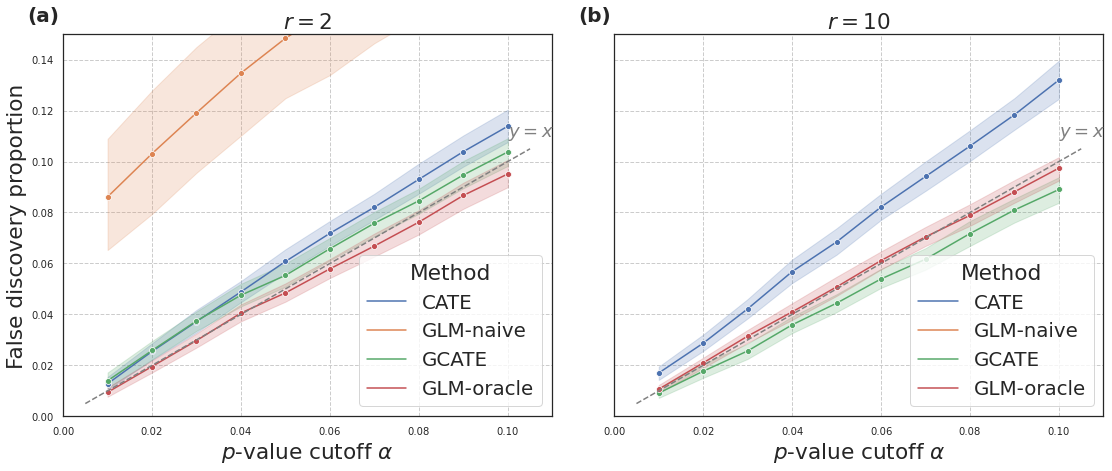

In [22]:
import seaborn as sns
sns.set_theme(style="white", font_scale=1.8)
fig, axes = plt.subplots(1,2,figsize=(16,7), sharey=True)

for i, r in enumerate([2,10]):
    sns.lineplot(data=_df[(_df['n']==250)&(_df['r']==r)
    ], x='alpha', y='fdp', hue='Method',
                marker='o', hue_order=['CATE', 'GLM-naive', 'GCATE',  'GLM-oracle'],
                 ax=axes[i])
    axes[i].plot(np.linspace(0.005,0.105, 10), np.linspace(0.005,0.105, 10), '--', color='gray')
    axes[i].text(0.1, 0.11, '$y=x$', color='gray', fontsize=18)
    axes[i].set_ylabel('False discovery proportion')
    axes[i].set_xlabel('$p$-value cutoff $\\alpha$')
    axes[i].set_title('$r={}$'.format(r))
    axes[i].set_ylim([0, 0.15])
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    axes[i].grid(True, linestyle='--')
    axes[i].legend(title='Method', loc='lower right')
axes[0].text(-0.008, 0.155, '(a)', fontsize=20, weight='bold')
axes[1].text(-0.008, 0.155, '(b)', fontsize=20, weight='bold')
fig.tight_layout()  
plt.savefig('result/fdp_vs_alpha.pdf', bbox_inches='tight', pad_inches=0, dpi=300)

## Table G2 sample splitting

In [23]:
family = 'poisson'
path_result = 'result/ex1/{}/'.format(family)


def load_res(path_result, method, n, r, ratio_infer, seed):
    if not method.startswith('cate'):
        _method = '{}_{}'.format(method, family)
    else:
        _method = method
    _df = pd.read_csv(
        path_result+'{}_{}_{}_{:.01f}_{}.csv'.format(_method, n,r,ratio_infer,seed),
    )
    
    _df_tmp = pd.DataFrame()
    for i, lam in enumerate(np.unique(_df['c2'])):
        _df_3 = _df[_df['c2']==lam].reset_index(drop=True)
        if np.any(np.isnan(_df_3[['p_values','q_values']])):
            print(method,n,r,seed,  lam, 'Nan')
            continue
        _df_2 = comp_stat(_df_3, alpha=0.05, q_alpha=0.2, n_top=50)
        _df_2['c2'] = lam
        _df_tmp = pd.concat([
            _df_tmp,
            _df_2
        ])       
    _df = _df_tmp
    
    _df['ratio_infer'] = ratio_infer
    _df['seed'] = seed
    _df['n'] = n
    _df['r'] = r
    return _df

df_res = pd.DataFrame()
method = 'gcate_raw'
    
n = 250
r = 2
for ratio_infer in np.linspace(0,1,6)[1:-1]:
    for seed in range(100):
        try:
            _df = load_res(path_result, method, n, r, ratio_infer, seed)            
            df_res = pd.concat([df_res, _df])
        except:
            print(method, n, r, seed)
            continue

df_res = df_res.reset_index(drop=True)

df_res['ratio_infer'] = np.round(df_res['ratio_infer'], 1)

for method in ['gcate_raw']:
    df = pd.read_csv('result/ex2/{}/'.format(family)+'result_summary_{}.csv'.format(method))
    df['ratio_infer'] = 'no'
    df = df[(df['n']==250) & (df['r']==2)]
    df_res = pd.concat([df_res, df], axis=0)

In [24]:
print(df_res[df_res['c2']==0.5].groupby('ratio_infer').median()[['type1_err','fdp','power','precision']].to_latex(
    index=True, float_format="{:.3f}".format,
)  )

\begin{tabular}{lrrrr}
\toprule
{} &  type1\_err &   fdp &  power &  precision \\
ratio\_infer &            &       &        &            \\
\midrule
0.2         &      0.050 & 0.200 &  0.454 &      0.610 \\
0.4         &      0.049 & 0.193 &  0.755 &      0.920 \\
0.6         &      0.050 & 0.191 &  0.901 &      1.000 \\
0.8         &      0.051 & 0.195 &  0.963 &      1.000 \\
no          &      0.051 & 0.219 &  0.987 &      1.000 \\
\bottomrule
\end{tabular}



# Splatter

## Example

In [25]:
path_data = 'data/ex3/'
family = 'negative_binomial'

p = 2500
d = 3

n = 100
r = 3
seed = 0

print('n:{}, r:{}, seed:{}'.format(n,r,seed))
    
Y = pd.read_csv(path_data+'{}_{}_Y.csv'.format(n,seed)).values.astype(np.float32)

id_genes = np.any(Y, axis=0) & (np.sum(Y>0, axis=0)>=10)
p_all = Y.shape[1]
Y = Y[:,id_genes]

B_true = pd.read_csv(path_data+'{}_{}_B.csv'.format(n,seed)).values[:,0]
X = pd.read_csv(path_data+'{}_{}_X.csv'.format(n,seed)).values

if family=='negative_binomial':
    disp = estimate_disp(Y, X)
    
    kwargs_glm = {
        'family':'negative_binomial', 
        'nuisance':disp
    }
else:
    kwargs_glm = {'family':family}

n:100, r:3, seed:0


In [26]:
r_max = 5
df_r = estimate_r(Y, X, r_max, 
    kwargs_glm=kwargs_glm, 
    kwargs_ls_1={'alpha':0.1}, kwargs_es_1={'max_iters': 2000},
    kwargs_ls_2={'alpha':0.01}, kwargs_es_2={'max_iters': 2000,'patience':25},
    c1=0.01,
    intercept=1, offset=0, C=1e3, verbose=True
)

{'kwargs_es': {'max_iters': 2000,
               'patience': 20,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'negative_binomial',
                'nuisance': array([[0.30332196, 0.13286857, 0.18595825, ..., 0.44372997, 0.6       ,
        0.47197981]])},
 'kwargs_ls': {'alpha': 0.1, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 3, 'n': 100, 'p': 1802, 'r': 1}


  8%|▊         | 166/2000 [00:33<06:10,  4.95it/s, nll=1.02] 


Best Epoch: 145. Best Metric: 1.018167.
Early stopped.
{'kwargs_es': {'max_iters': 2000,
               'patience': 25,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'negative_binomial',
                'nuisance': array([[0.30332196, 0.13286857, 0.18595825, ..., 0.44372997, 0.6       ,
        0.47197981]])},
 'kwargs_ls': {'alpha': 0.01, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 3, 'n': 100, 'p': 1802, 'r': 1}


  2%|▏         | 39/2000 [00:01<01:11, 27.59it/s, nll=1.01]


Best Epoch: 13. Best Metric: 1.014476.
Early stopped.
{'kwargs_es': {'max_iters': 2000,
               'patience': 20,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'negative_binomial',
                'nuisance': array([[0.30332196, 0.13286857, 0.18595825, ..., 0.44372997, 0.6       ,
        0.47197981]])},
 'kwargs_ls': {'alpha': 0.1, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 3, 'n': 100, 'p': 1802, 'r': 2}


 11%|█         | 213/2000 [00:05<00:47, 37.74it/s, nll=1.00]


Best Epoch: 192. Best Metric: 0.996298.
Early stopped.
{'kwargs_es': {'max_iters': 2000,
               'patience': 25,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'negative_binomial',
                'nuisance': array([[0.30332196, 0.13286857, 0.18595825, ..., 0.44372997, 0.6       ,
        0.47197981]])},
 'kwargs_ls': {'alpha': 0.01, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 3, 'n': 100, 'p': 1802, 'r': 2}


  2%|▏         | 40/2000 [00:01<01:04, 30.22it/s, nll=0.99]


Best Epoch: 14. Best Metric: 0.987443.
Early stopped.
{'kwargs_es': {'max_iters': 2000,
               'patience': 20,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'negative_binomial',
                'nuisance': array([[0.30332196, 0.13286857, 0.18595825, ..., 0.44372997, 0.6       ,
        0.47197981]])},
 'kwargs_ls': {'alpha': 0.1, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 3, 'n': 100, 'p': 1802, 'r': 3}


 12%|█▏        | 243/2000 [00:06<00:45, 38.38it/s, nll=0.97]


Best Epoch: 222. Best Metric: 0.974400.
Early stopped.
{'kwargs_es': {'max_iters': 2000,
               'patience': 25,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'negative_binomial',
                'nuisance': array([[0.30332196, 0.13286857, 0.18595825, ..., 0.44372997, 0.6       ,
        0.47197981]])},
 'kwargs_ls': {'alpha': 0.01, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 3, 'n': 100, 'p': 1802, 'r': 3}


  2%|▏         | 42/2000 [00:01<01:01, 31.89it/s, nll=0.96]


Best Epoch: 16. Best Metric: 0.958765.
Early stopped.
{'kwargs_es': {'max_iters': 2000,
               'patience': 20,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'negative_binomial',
                'nuisance': array([[0.30332196, 0.13286857, 0.18595825, ..., 0.44372997, 0.6       ,
        0.47197981]])},
 'kwargs_ls': {'alpha': 0.1, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 3, 'n': 100, 'p': 1802, 'r': 4}


 13%|█▎        | 255/2000 [00:06<00:46, 37.47it/s, nll=0.97]


Best Epoch: 234. Best Metric: 0.970899.
Early stopped.
{'kwargs_es': {'max_iters': 2000,
               'patience': 25,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'negative_binomial',
                'nuisance': array([[0.30332196, 0.13286857, 0.18595825, ..., 0.44372997, 0.6       ,
        0.47197981]])},
 'kwargs_ls': {'alpha': 0.01, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 3, 'n': 100, 'p': 1802, 'r': 4}


  2%|▏         | 43/2000 [00:01<01:04, 30.32it/s, nll=0.95]


Best Epoch: 17. Best Metric: 0.953984.
Early stopped.
{'kwargs_es': {'max_iters': 2000,
               'patience': 20,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'negative_binomial',
                'nuisance': array([[0.30332196, 0.13286857, 0.18595825, ..., 0.44372997, 0.6       ,
        0.47197981]])},
 'kwargs_ls': {'alpha': 0.1, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 3, 'n': 100, 'p': 1802, 'r': 5}


 14%|█▍        | 290/2000 [00:07<00:43, 39.37it/s, nll=0.97]


Best Epoch: 269. Best Metric: 0.967213.
Early stopped.
{'kwargs_es': {'max_iters': 2000,
               'patience': 25,
               'tolerance': 0.0001,
               'warmup': 5},
 'kwargs_glm': {'family': 'negative_binomial',
                'nuisance': array([[0.30332196, 0.13286857, 0.18595825, ..., 0.44372997, 0.6       ,
        0.47197981]])},
 'kwargs_ls': {'alpha': 0.01, 'beta': 0.5, 'max_iters': 20, 'tol': 0.0001}}
{'d': 3, 'n': 100, 'p': 1802, 'r': 5}


  2%|▏         | 43/2000 [00:01<01:02, 31.45it/s, nll=0.95]

Best Epoch: 17. Best Metric: 0.948770.
Early stopped.


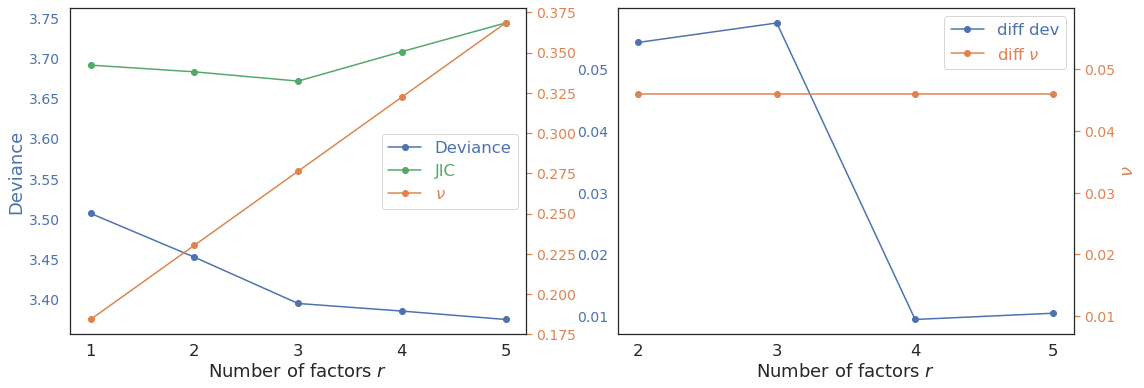

In [27]:
from gcate import plot_r
sns.set(font_scale=1.5, style='white')
fig = plot_r(df_r)

## Figure 5

In [28]:
path_result = 'result/ex3/'
r = 3
n_top = 100

def load_res(path_result, method, n, r, seed):
    if not method.startswith('cate'):
        _method = '{}_{}'.format(method, family)
    else:
        _method = method
    _df = pd.read_csv(
        path_result+'{}_{}_{}_{}.csv'.format(_method, n,r,seed),
    )
    
    if method.startswith('gcate'):
        _df_tmp = pd.DataFrame()
        for i, lam in enumerate(np.unique(_df['c2'])):
            _df_3 = _df[_df['c2']==lam].reset_index(drop=True)
            if np.any(np.isnan(_df_3[['p_values','q_values']])):
                print(method,n,r,seed,  lam, 'Nan')
                continue
            _df_2 = comp_stat(_df_3, alpha=0.05, q_alpha=0.2, n_top=n_top)
            _df_2['c2'] = lam
            _df_2['median'] = np.nanmedian(_df_3['z_scores'])
            _df_2['mad'] = sp.stats.median_abs_deviation(_df_3['z_scores'], scale="normal", nan_policy='omit')
            _df_tmp = pd.concat([
                _df_tmp,
                _df_2
            ])

        _df_tmp = _df_tmp.sort_values('c2').reset_index(drop=True)
        idc = np.where((_df_tmp['median'].abs()>=0.025))[0]
        idc = 1 if len(idc)==0 or idc[0]==0 else idc[0]
        _df_tmp = _df_tmp.iloc[idc - 1:idc,:]
        _df = _df_tmp
    else:
        if np.any(np.isnan(_df[['p_values','q_values']])):
            print(method,n,r,seed, 'Nan')
            return None        
        _df = comp_stat(_df, alpha=0.05, q_alpha=0.2, n_top=n_top)
        _df['c2'] = np.nan
    _df['Method'] = method_name[_method]
    _df['seed'] = seed
    _df['n'] = n
    _df['r'] = r
    return _df

method_list = [
    'cate_raw', 'gcate_raw_negative_binomial',
    'glm_negative_binomial', 'glm_oracle_negative_binomial',
]
method_name_list = ['CATE-Raw', 'GCATE-Raw', 'GLM-NB', 'GLM-oracle']
method_name = {i:j for i,j in zip(method_list,method_name_list)}


df_res = pd.DataFrame()
for n in [100,200]:
    for seed in range(0,100):
        for method in ['cate_raw','glm','gcate_raw','glm_oracle']:#
            for family in ['negative_binomial']:
                
                try:
                    _df = load_res(path_result, method, n, r, seed)
                except:
                    print(method, n, seed)
                    continue
                df_res = pd.concat([df_res, _df])
                if method.startswith('cate') or method.startswith('gcate'):
                    break

# for method in method_list:
#     df_res[df_res['Method'] == method_name[method]].reset_index().to_csv(
#         path_result+'result_summary_{}.csv'.format(method), index=False)

metric = ['type1_err','fdp','power','precision']
df_res = pd.melt(df_res, id_vars=['Method','seed','n','r','c2'], value_vars=metric)
metric_name = ['Type-I error','FDP','Power','Precision']
df_res['variable'] = df_res['variable'].map({i:j for i,j in zip(metric,metric_name)})
df_res['c2'] = np.nan

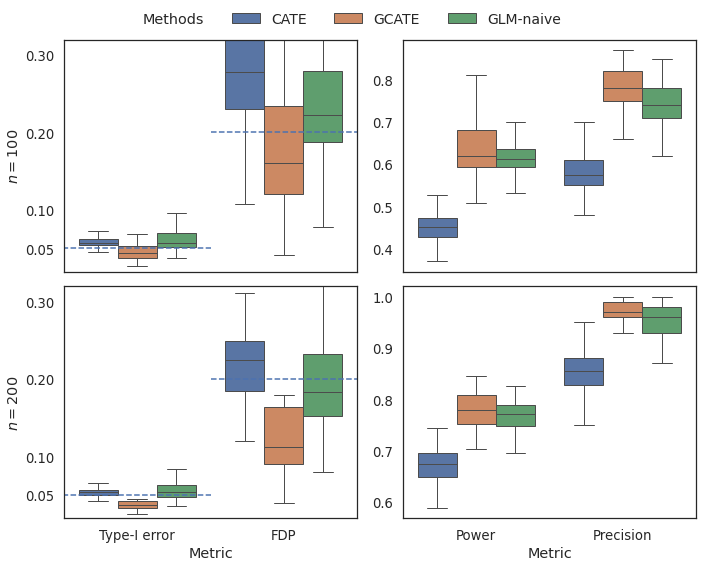

In [29]:
method_name_list = ['CATE-Raw', 'GCATE-Raw', 'GLM-NB']
import seaborn as sns

sns.set_theme(style="white", font_scale=1.2)

fig, axes = plt.subplots(2,2,figsize=(10,8), sharex='col')
for i,n in enumerate([100,200]):
    _df = df_res[(df_res['n']==n) & df_res['variable'].isin(['Type-I error','FDP'])].reset_index(drop=True)

    sns.boxplot(_df, 
                x='variable', y='value', hue='Method', hue_order=method_name_list, showfliers=False, ax=axes[i,0])
    xlim = axes[i,0].get_xlim()
    axes[i,0].hlines(0.05,-2,0.5, linestyle='--')
    axes[i,0].hlines(0.2,0.5,2, linestyle='--')
    axes[i,0].set_xlim(xlim)

    sns.boxplot(df_res[(df_res['n']==n) & ~df_res['variable'].isin(['Type-I error','FDP'])], 
                x='variable', y='value', hue='Method', hue_order=method_name_list, showfliers=False, ax=axes[i,1])

    axes[i,0].set_ylabel('$n={}$'.format(n))
    axes[i,1].set_ylabel('')
    axes[i,0].set_ylim([0.02,.32])

for j in range(2):
    axes[0,j].set_xlabel('')
    axes[1,j].set_xlabel('Metric')

for i in range(2):
    axes[i,0].set_yticks([0.05,0.1,0.2,0.3])

lines_labels = [ax.get_legend_handles_labels() for ax in [axes[0,0]]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
_, indices = np.unique(labels, return_index=True)
labels = ['CATE', 'GCATE', 'GLM-naive']
for i in range(2):
    for j in range(2):
        axes[i,j].get_legend().remove()
        
legend = fig.legend(handles=handles, labels=labels,
                    loc=9, ncol=10, title='Methods', frameon=False, fontsize=14)
def legend_title_left(leg):
    c = leg.get_children()[0]
    title = c.get_children()[0]
    hpack = c.get_children()[1]
    c._children = [hpack]
    hpack._children = [title] + hpack.get_children()
legend_title_left(legend)

fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.savefig('result/ex3_NB.pdf', bbox_inches='tight', pad_inches=0, dpi=300)